# What is DBSCAN?

## Introduction

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is powerful a density-based clustering algorithm that identifies groups of closely packed data points. When there are outliers, it marks those as noise based on their density in the feature space. To identify clusters, the algorithm detects them as dense regions in the data space, separated by areas with lower density. DBSCAN can also handle real world data irregularities like arbitrary shaped clusters (not just circles or convex shaped data), and general noise and outliers (it effectively deals with these without assigning them to any cluster). This is different from hierarchical or K-Means clustering, which assumes clusters are spherical and compact when identifying them.

### One of DBSCAN's biggest strengths is its ability to automatically determine the number of clusters without requiring prior knowledge. This makes it especially useful in scenarios where clusters may not be well-defined or when working with complex datasets where standard clustering methods struggle.





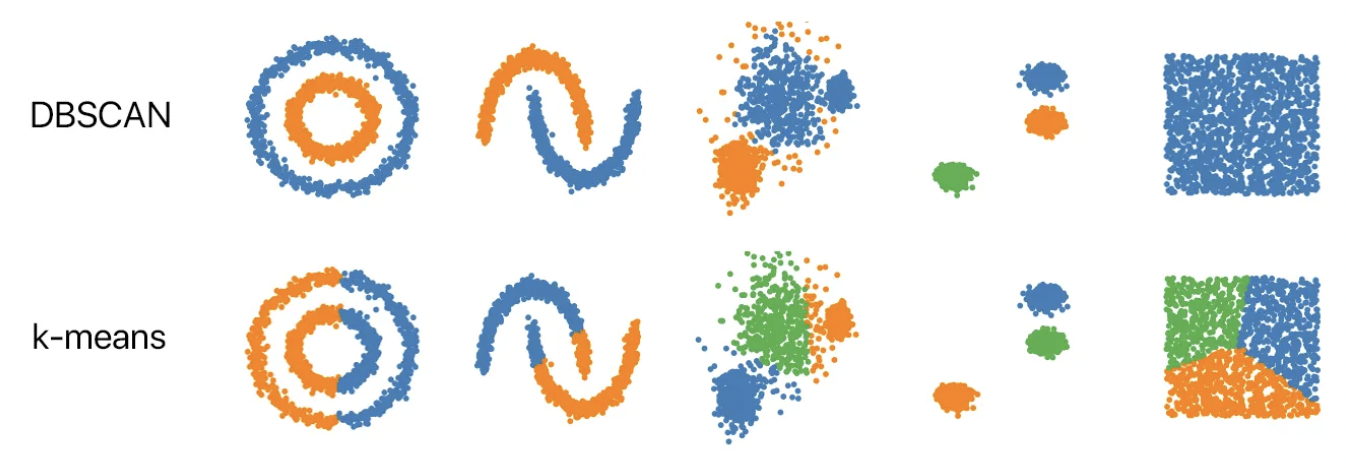

## Parameters for Model

### DBSCAN relies on two key parameters that signficantly impacts its peformance:

### 1. ***eps*** (Epsilon): this parameter defines the radius of a neighborhood around each data point. Two points are considered neighbors if the distance between them is les than or equal to ***eps***. The choice of ***eps*** is crucial:
*   If ***eps*** is too small, the algorithm may classify most points as noise
*   If ***eps*** is too large, distince clusters may merge, leading to poor results
*   A common technique to determine a good ***eps*** is by analyzing a k-distance graph, which helps identify a natural cut-off where density shifts

### 2. ***MinPts*** (Minimum Points): This defines the minimum number of points required within an ***eps*** radius for a region to be considered dense. A general rule is to set ***MinPts*** to at least D+1, where D is the number of dimensions in the dataset. In most cases, a value of at least 3 is recommended. This parameter helps DBSCAN distinguish between dense clusters and scattered noise points.

### Carefully tuning these parameters is crucal to achieving meaningful clustering results.

## How does DBSCAN work?

### DBSCAN clusters data by classifying points into three main categories:
*   Core Points: these have at least ***MinPts*** neighbors within the ***eps*** radius and form the foundation of clusters
*   Border Points: these fall within the ***eps*** radius of a core point but do not have enough neighbors to be considered core points themselves. They are part of a cluster but do not contribute to its expansion
*   Noise Points: These do not belond to any cluster because they lack enough close neighbors. DBSCAN effectively filters these outliers instead of forcing them into a cluster

### The algorithm starts by selecting an unvisited point and checking its neighbors. If it qualifies as a core point, a new cluster is formed, and DBSCAN expands outward by including all density-reachable points. This process continues until no more points can be added. The result is a set of clusters with varying shapes and sizes, along with isolated noise points taht don't fit any pattern.

### By relying on density rather than distance-based assumptions, DBSCAN provides a flexible and robust approach to clustering, making it ideal for datasets that have complex structures and outliers.



# DBSCAN in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

filename = "/Users/maciek/Downloads/diabetes_dataset_with_notes.csv"

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_balanced)

dbscan = DBSCAN(eps = 1.5, min_samples = 5)
db_labels = dbscan.fit_predict(X_scaled)

print("Cluster Labels Found:", set(db_labels))

df_results = pd.DataFrame({'TrueLabel': y_train_balanced, 'ClusterLabel': db_labels})
print("\nCross-tab between true labels and DBSCAN clusters:")
print(pd.crosstab(df_results['TrueLabel'], df_results['ClusterLabel']))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Cluster Labels Found: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202

# Visualizing Results

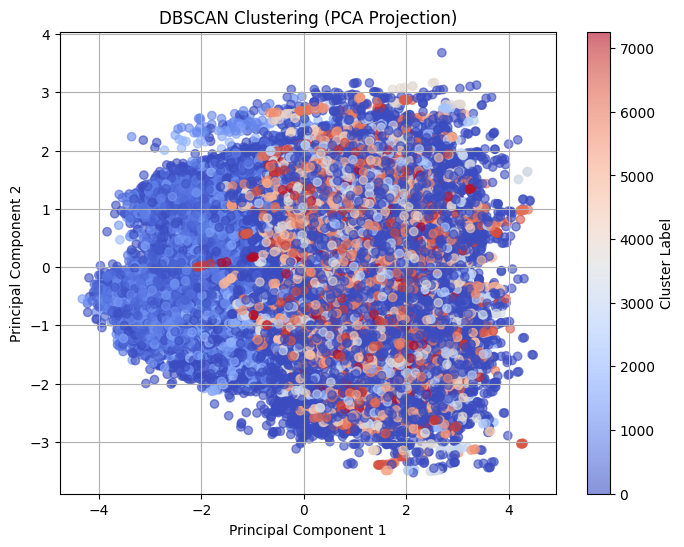

In [3]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = db_labels, cmap = 'coolwarm', alpha = 0.6)
plt.title('DBSCAN Clustering (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()

## This chart is showing the groups (clusters) that the algorithm found in the dataset.

### Each colored dot represents a person. People who the algorithm thought were similar based on their data are grouped together with the same color. The scattered dots of a different color (typically darker) are people who didn't really fit into any clear group.

### The algorithm identified a large, central group that contains a mix of individuals with and without diabetes. It also identified a substantial portion of data points as "noise," meaning they didn't clearly belond to any cluster. This suggests that with these specific settings, the algorithm didn't effectively separate those with diabetes and those without into distinct clusters.